In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

from pandas import DataFrame
from subprocess import check_output
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
# load the dataset

df_columns = pd.read_csv("leagueoflegends.csv",sep=',')
df_original = pd.read_csv("leagueoflegends.csv",sep=',')

In [18]:
# Data info

df_original[['bResult','goldblue','bKills','bTowers', 'bInhibs', 'bDragons', 'bBarons', 'bHeralds']].head(3)

,bResult,goldblue,bKills,bTowers,bInhibs,bDragons,bBarons,bHeralds
0,1,"[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...","[[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...","[[27.542, 'MID_LANE', 'BASE_TURRET'], [39.269,...","[[36.686, 'MID_LANE'], [29.274, 'MID_LANE']]","[[37.267, None]]",[],[]
1,0,"[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...","[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...","[[23.239, 'BOT_LANE', 'OUTER_TURRET'], [33.018...",[],"[[32.545, None], [26.177, None], [19.119, None]]",[[29.255]],[]
2,1,"[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...","[[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho...","[[15.045, 'BOT_LANE', 'OUTER_TURRET'], [39.566...","[[37.511, 'TOP_LANE'], [37.38, 'BOT_LANE'], [3...","[[24.577, None], [37.867, None], [30.87, None]...",[[35.144]],[]


In [19]:
# Information of the dataframe

df_original.info()
df = df_original.copy(deep=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   League            7620 non-null   object
 1   Year              7620 non-null   int64 
 2   Season            7620 non-null   object
 3   Type              7620 non-null   object
 4   blueTeamTag       7582 non-null   object
 5   bResult           7620 non-null   int64 
 6   rResult           7620 non-null   int64 
 7   redTeamTag        7583 non-null   object
 8   gamelength        7620 non-null   int64 
 9   golddiff          7620 non-null   object
 10  goldblue          7620 non-null   object
 11  bKills            7620 non-null   object
 12  bTowers           7620 non-null   object
 13  bInhibs           7620 non-null   object
 14  bDragons          7620 non-null   object
 15  bBarons           7620 non-null   object
 16  bHeralds          7620 non-null   object
 17  goldred       

In [22]:
# MANIPULATING OF DATASETS

In [23]:
# Transform all the columns containing pseudo lists to real lists

df['goldblue'] = df['goldblue'].apply(literal_eval)
df['bKills'] = df['bKills'].apply(literal_eval)
df['bTowers'] = df['bTowers'].apply(literal_eval)
df['bInhibs'] = df['bInhibs'].apply(literal_eval)
df['bDragons'] = df['bDragons'].apply(literal_eval)
df['bBarons'] = df['bBarons'].apply(literal_eval)
df['bHeralds'] = df['bHeralds'].apply(literal_eval)

df['goldred'] = df['goldred'].apply(literal_eval)
df['rKills'] = df['rKills'].apply(literal_eval)
df['rTowers'] = df['rTowers'].apply(literal_eval)
df['rInhibs'] = df['rInhibs'].apply(literal_eval)
df['rDragons'] = df['rDragons'].apply(literal_eval)
df['rBarons'] = df['rBarons'].apply(literal_eval)
df['rHeralds'] = df['rHeralds'].apply(literal_eval)

In [26]:
# Capturing only the information that interests us from the data lists
# These are informations that directly affects the result of the game.
######################################################################
# blueTeamTag Blue Team's tag name
# bResult Result of the match for Blue Team 1 is a win, 0 is a loss
# goldblue Blue Team's total gold value by minute
# bKills List of Blue Team's kills - [Time in minutes, Victim, Killer, Assist1, Assist2, Assist3, Assist4, x_pos, y_pos]
# bTowers List of minutes that Blue Team destroyed a tower and Tower Location
# bInhibs List of minutes that Blue Team destroyed an inhibitor and Location
# bDragons List of minutes that Blue Team killed a dragon
# bBarons List of minutes that Blue Team killed a baron
# bHeralds List of minutes that Blue Team killed a rift herald
# redTeamTag Red Team's tag name (ex. Cloud9 is C9)
# bResult Result of the match for Red Team 1 is a win, 0 is a loss
# goldblue Red Team's total gold value by minute
# bKills List of Red Team's kills - [Time in minutes, Victim, Killer, Assist1, Assist2, Assist3, Assist4, x_pos, y_pos]
# bTowers List of minutes that Red Team destroyed a tower and Tower location
# bInhibs List of minutes that Red Team destroyed an inhibitor and location
# bDragons List of minutes that Red Team killed a dragon
# bBarons List of minutes that Red Team killed a baron
# bHeralds List of minutes that Red Team killed a rift herald

data = pd.DataFrame()

data['blue_tag'] = df['blueTeamTag']
data['blue_result'] = df['bResult']
data['blue_end_gold'] = df['goldblue'].apply(max)
data['blue_kills'] = df['bKills'].apply(len)
data['blue_towers'] = df['bTowers'].apply(len)
data['blue_inhibs'] = df['bInhibs'].apply(len)
data['blue_dragons'] = df['bDragons'].apply(len)
data['blue_barons'] = df['bBarons'].apply(len)
data['blue_heralds'] = df['bHeralds'].apply(len)

data['red_tag'] = df['redTeamTag']
data['red_result'] = df['rResult']
data['red_end_gold'] = df['goldred'].apply(max)
data['red_kills'] = df['rKills'].apply(len)
data['red_towers'] = df['rTowers'].apply(len)
data['red_inhibs'] = df['rInhibs'].apply(len)
data['red_dragons'] = df['rDragons'].apply(len)
data['red_barons'] = df['rBarons'].apply(len)
data['red_heralds'] = df['rHeralds'].apply(len)

data = data[(data['blue_tag'] == 'C9') | (data['red_tag'] == 'C9')]
data = data.reset_index(drop=True)

# I also created a new column for the winner team.
data['winner'] = np.where(data['blue_result'] == 1, 1, 2)

# # Information of the data
data

,blue_tag,blue_result,blue_end_gold,blue_kills,blue_towers,blue_inhibs,blue_dragons,blue_barons,blue_heralds,red_tag,red_result,red_end_gold,red_kills,red_towers,red_inhibs,red_dragons,red_barons,red_heralds,winner
0,TSM,1,62729,16,9,2,1,0,0,C9,0,56672,9,4,0,3,1,0,1
1,C9,0,59589,8,6,0,0,1,0,GV,1,70503,22,11,4,4,1,0,2
2,C9,1,67964,15,11,3,4,2,0,TL,0,52080,3,4,0,0,0,0,1
3,CLG,1,59361,15,10,2,5,0,0,C9,0,52276,7,3,0,0,0,0,1
4,C9,1,57704,17,9,2,2,1,0,T8,0,47025,4,3,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,FNC,0,49912,7,4,0,2,0,0,C9,1,60523,17,11,3,1,1,1,2
301,CLG,0,58647,8,3,0,1,0,0,C9,1,63614,12,8,1,2,1,0,2
302,GGS,0,64672,9,2,0,0,0,1,C9,1,80032,16,11,2,2,1,0,2
303,C9,0,84986,17,5,0,2,1,1,FOX,1,91290,26,9,2,3,1,0,2


In [27]:
# EXPLORE THE DATASET

In [29]:
# A good indicator of how well your team is doing in a match is how many objectives your team has taken.

# These objectvies are:

# 1- Gold
# 2- Player kills
# 3- Tower kills
# 4- Inhibitor kills
# 5- Dragon kills
# 6- Baron kills
# 7- Herald kills

# I will use these as our source of data when predicting the result of each match

<AxesSubplot:>

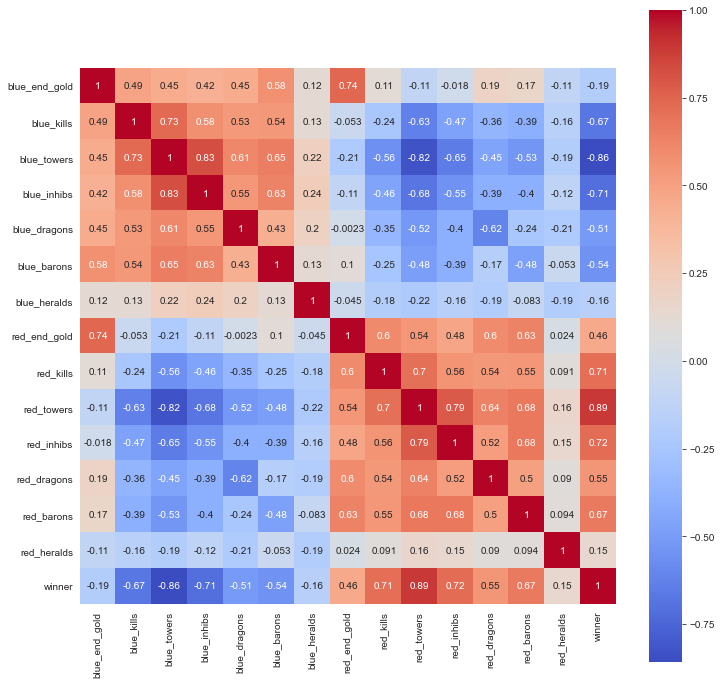

In [30]:
fig = plt.figure(figsize=(12,12))

sns.set_style('darkgrid')
sns.heatmap(data[['blue_end_gold','blue_kills', 'blue_towers', 'blue_inhibs', 'blue_dragons', 'blue_barons', 'blue_heralds',
                  'red_end_gold','red_kills','red_towers','red_inhibs', 'red_dragons', 'red_barons', 'red_heralds', 'winner']].corr(), annot=True, square=True, cmap='coolwarm')

In [31]:
# From this heat map, we can see that the correlation for each objective is:

# 1- Towers Kills: ~.87 (Strong correlation)
# 2- Inhibitors Kills: ~.71 (Strong/Moderate correlation)
# 3- Enemies Kills: ~.69 (Strong/Moderate correlation)
# 4- Barons Kills: ~.60 (Moderate correlation)
# 5- Dragons Kills: ~.53 (Moderate correlation)
# 6- Gold Earn: ~.32 (Weak correlation)
# 7- Heralds Kills: ~.15 (Weak correlation)

In [32]:
# SPLIT THE DATA 

In [33]:
# I want to split our data into a set that we train the model on and a set we test the model with. 
# Using Scikit-learn, I can split our data so that we train on the majority (66.6%) and test the rest (33.3%) .

In [34]:
X = data[['blue_end_gold','blue_kills', 'blue_towers', 'blue_inhibs', 'blue_dragons', 'blue_barons', 'blue_heralds',
          'red_end_gold','red_kills','red_towers','red_inhibs', 'red_dragons', 'red_barons', 'red_heralds']]
y = data['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
# CREATE AND TRAİN THE MODEL

In [36]:
# With our data split, I can create a logistic regression model and fit it to our training data

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

In [39]:
# EVALUATE THE CREATED MODEL

Classification Report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99        51
           2       1.00      0.98      0.99        50

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

Accuracy of Logistic Regression: 99.01%


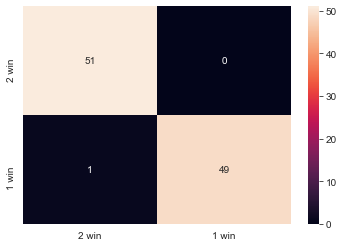

In [40]:
cr = classification_report(y_test, predictions)
print('Classification Report : \n', cr)

acc = round(logmodel.score(X_test, y_test) * 100, 2)
print("Accuracy of Logistic Regression: " + str(acc) + "%")

cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['2 win', '1 win'], yticklabels=['2 win', '1 win'],);

In [41]:
# TESTİNG THE PREDICTOR

In [42]:
# Predict the TSM x C9 match
x1 = [[62729, 16, 9, 2, 1, 0, 0,
       56672, 9, 4, 0, 3, 1, 0]]

pred = logmodel.predict_proba(x1).reshape(-1,1)

win = round(logmodel.predict(x1)[0], 2)
print("Winner is :", win)

fir_prob = round(pred[0][0] * 100, 2)
sec_prob = round(pred[1][0] * 100, 2) 
print("First team (blue) win probability is: " + str(fir_prob) + "%")
print("Second team (red) win probability is: " + str(sec_prob) + "%")

Winner is : 1
First team (blue) win probability is: 99.99%
Second team (red) win probability is: 0.01%
